 <h1 style="text-align: center; color: RED">ÖLÇÜMLEME PROBLEMLERİ</h1>

 <h2 style="text-align: center; color: RED">AB TESTING</h2>

<span style="color: blue; font-weight: bold;">1-TEMEL İSTATİSTİK KAVRAMLARI</span>


**Sampling(Örnekleme):** Bir ana kitle içerisinden bu ana kitlenin özelliklerini iyi temsil ettiği varsayılan bir alt kümedir. Ana kitlenin bir temsilcisidir.

🔹 Popülasyon (Ana Kütle) → İncelemek istediğimiz tüm veri kümesi.

🔹 Örneklem → Popülasyondan seçtiğimiz küçük ama temsil edici bir grup.

**Neden Önemlidir?**
  
Hızlı Sonuç Almayı Sağlar → Tüm veri kümesini işlemek yerine küçük bir kısmını analiz etmek daha hızlıdır.

Maliyetleri Düşürür → Büyük veri kümeleriyle çalışmak maliyetli olabilir.

Genelleme Yapmamızı Sağlar → Küçük bir grup, tüm popülasyonu temsil ediyorsa, sonuçlar genellenebilir.

İşlem Gücünü Azaltır → Büyük veriler üzerinde analiz yapmak zor ve zaman alıcı olabilir.



In [13]:
pip install statsmodels #kütüphaneyi kurduk


Note: you may need to restart the kernel to use updated packages.


In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
########ÖRNEKLEM########
populasyon = np.random.randint(0, 80, 10000)#0 ile 80 arasında 10000 tane sayı üretir.
populasyon

array([79, 20, 22, ..., 65,  4, 57])

In [10]:
populasyon.mean()

39.2424

**Neden örneklem ile çalışıyoruz?**

Bu sayıların bir bölgedeki insanların yaşlarını temsil ettiğini varsayalım. Amacım, bu bölgedeki 10.000 kişiye ulaşıp ortalama yaş bilgisini öğrenmek. Ancak örnekleme teorisi bize şunu söyler: "Tüm nüfusu gezmene gerek yok. Eğer rastgele ve tarafsız bir şekilde seçilmiş, nüfusu iyi temsil eden bir örneklem alırsan, bu örneklem üzerinden tüm topluluğa dair güvenilir çıkarımlar yapabilirsin.

In [14]:
np.random.seed(115) 
#NumPy'de rastgele sayı üretimini kontrol altına almak için kullanılır.
# Bu işlem, rastgele sayı üreteçlerinin her çalıştırıldığında aynı sonuçları vermesini sağlar.


In [16]:
orneklem = np.random.choice(a=populasyon, size=100)#100 tane rastgele örneklem sectik

In [20]:
orneklem.mean()

38.22

* Görüldüğü üzere secilen örneklemin ortalaması anakitlenin ortalamasına yakın bir değerde.Daha az veri ile genelleme yapabildik. Tabiki bir yanılma payı olduğunu unutmayalım.

In [30]:

orneklem1 = np.random.choice(a=populasyon, size=100)
orneklem2 = np.random.choice(a=populasyon, size=100)
orneklem3 = np.random.choice(a=populasyon, size=100)
orneklem4 = np.random.choice(a=populasyon, size=100)
orneklem5 = np.random.choice(a=populasyon, size=100)
orneklem6 = np.random.choice(a=populasyon, size=100)
orneklem7 = np.random.choice(a=populasyon, size=100)
orneklem8 = np.random.choice(a=populasyon, size=100)
orneklem9 = np.random.choice(a=populasyon, size=100)
orneklem10 = np.random.choice(a=populasyon, size=100)

In [32]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean()
 + orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

38.580999999999996

* Örneklem sayısı arttıkça ortalama anakitlenin ortalamasına yakınsayacaktır.

<span style="color: blue; font-weight: bold;">2-BETİMSEL İSTATİSTİKLER</span>

Betimsel istatistik (Descriptive Statistics), bir veri setini özetlemek, organize etmek ve açıklamak için kullanılan yöntemlerdir.

**Amacı:**

🔹 Veriyi daha anlaşılır hale getirmek,

🔹 Ana eğilimleri (ortalama, medyan, mod vb.) belirlemek,

🔹 Dağılımı ve değişkenliği analiz etmek.

✔ Verinin tamamını değil, temel özelliklerini vurgular!

✔ Veri hakkında genel bir fikir edinmemizi sağlar!



**1-Ortalama:** Ortalama (Mean), bir veri setindeki tüm değerlerin toplamının, toplam eleman sayısına bölünmesiyle elde edilen değerdir. Merkezi eğilim ölçülerinden biridir ve genellikle verinin genel eğilimini anlamak için kullanılır.

**2-Standart Sapma:** Bir veri setindeki verilerin ortalamadan ne kadar sapma gösterdiğini ölçen bir istatistiksel kavramdır.

🔹 Verilerin yayılma derecesini ve değişkenliğini anlamamıza yardımcı olur.

🔹 Düşük standart sapma → Veriler ortalamaya yakın demektir.

🔹 Yüksek standart sapma → Veriler ortalamadan çok sapıyor, yani daha değişken.

*Standart Sapma Ne Zaman Kullanılmamalıdır?*

🔹 Çok büyük aykırı değerler varsa: Standart sapma, uç değerlerden çok etkilenir. Eğer veri setinde çok büyük ya da küçük aykırı değerler (outliers) varsa, medyan ve çeyrekler aralığı (IQR) gibi diğer ölçütler daha güvenilir olabilir.

🔹 Veri dağılımı çok çarpık (skewed) ise: Dağılım simetrik değilse, standart sapma yanıltıcı olabilir.



**3-Varyans:** Bir veri kümesindeki değerlerin ortalamadan ne kadar sapma gösterdiğini ölçen istatistiksel bir değerdir. Başka bir deyişle, veri noktalarının birbirine ve ortalamaya olan uzaklığını ölçer. Düşük varyans: Veriler ortalamaya yakın olup birbirine daha çok benzer. Yüksek varyans: Veriler ortalamadan uzaklaşıp daha dağınık bir yapı gösterir.

* Yüksek Varyans = Dağınık Veri

Eğer bir veri setinin varyansı yüksekse, şu özellikleri gösterir:

✅ Veri noktaları geniş bir aralığa yayılmıştır.

✅ Ortalamaya uzak veri noktaları fazladır.

✅ Değişkenlik yüksektir, yani veriler birbirinden çok farklı olabilir.

* Varyansı Grafik Üzerinde Gösterme

Aşağıdaki gibi iki dağılımı hayal edebilirsin:

🔹 Düşük Varyans: Veriler sıkışık ve yoğunlaşmış (dar bir tepe).

🔹 Yüksek Varyans: Veriler geniş bir alana dağılmış (yayvan bir dağılım).
Eğer veri noktaları çok uzak ve geniş bir aralıkta yayılmışsa, veri seti dağınık demektir.


**4-Çeyreklik Değerler:** Çeyreklik değerler, bir veri setini dörde bölen ve dağılımı anlamamıza yardımcı olan üç önemli istatistiksel değerdir.
Birinci çeyrek (Q1 - Alt Çeyrek): Verilerin %25’inin altında kaldığı değerdir. (25. yüzdelik dilim - Q1)

İkinci çeyrek (Q2 - Medyan): Verilerin %50’sinin altında kaldığı değerdir. (50. yüzdelik dilim Medyan/Q2)

Üçüncü çeyrek (Q3 - Üst Çeyrek): Verilerin %75’inin altında kaldığı değerdir. (75. yüzdelik dilim - Q3)

Çeyreklikler, veri setinin dağılımını ve yayılımını anlamak için kullanılır. Özellikle aykırı değerleri tespit etmekte oldukça etkilidirler
.
Burada Q1 ve Q3 arasındaki fark, çeyrekler arası açıklık (IQR - Interquartile Range) olarak adlandırılır:
IQR=Q3−Q1


**5-Medyan:** Medyan, bir veri setindeki ortanca (merkez) değerdir. Verileri küçükten büyüğe sıraladığımızda, tam ortada bulunan değer medyan olarak adlandırılır. Özellikle aykırı değerlere duyarlı olmayan yapısı nedeniyle bazı analizlerde aritmetik ortalamaya tercih edilir. Medyan, uç (aykırı) değerlerden etkilenmediği için veri setinin merkezi eğilimini doğru bir şekilde gösterir.

✅ Aykırı Değerlere Karşı Dayanıklıdır:

Medyan, uç değerlerden etkilenmez. Örneğin, [10, 15, 20, 25, 1000] veri setinde ortalama 214 çıkar ama medyan = 20’dir. Aykırı değerlerden dolayı ortalama çok büyük olabilir ama medyan daha güvenilir bir merkez ölçüsüdür.

✅ Veri Dağılımını Daha İyi Anlamamızı Sağlar:

Simetrik dağılımda → Medyan ve ortalama yaklaşık eşittir.

Sağa çarpık dağılımda → Medyan, ortalamadan küçük olur.

Sola çarpık dağılımda → Medyan, ortalamadan büyük olur.


In [50]:
df = sns.load_dataset('tips')

In [54]:
df.describe().T#temel istatistik bilgilerini verir.

,count,mean,std,min,25%,50%,75%,max
total_bill,244.00000,19.78594,8.90241,3.07000,13.34750,17.79500,24.12750,50.81000
tip,244.00000,2.99828,1.38364,1.00000,2.00000,2.90000,3.56250,10.00000
size,244.00000,2.56967,0.95110,1.00000,2.00000,2.00000,3.00000,6.00000


Mean, parametrik ortalamayı; median ise nonparametrik ortalamayı temsil eder.
Eğer elimizdeki değişkenin dağılımı çarpıksa, yani içerisinde aykırı değerler barındırıyorsa, bu değişkeni tanımlamak için aritmetik ortalama (mean) yerine medyan (median, %50'lik değer) tercih edilmelidir.

Bir değişkende aykırı değer olup olmadığını anlamanın pratik yollarından biri, ortalama ile medyan değerini karşılaştırmaktır. Eğer bu iki değer birbirine yakınsa, değişkende ciddi bir aykırı değer problemi yoktur denebilir. Ancak aralarında belirgin bir fark varsa, bu durum dağılımın çarpık olduğunu ve aykırı değer içerdiğini gösterebilir.

Ayrıca, çeyrek değerler (Q1, Q3) ve bu değerlerden elde edilen IQR (Interquartile Range – çeyrekler arası açıklık), dağılımın yapısı ve olası aykırı değerler hakkında daha detaylı bilgi sunar.

<span style="color: blue; font-weight: bold;">3-GÜVEN ARALIKLARI</span>

Güven aralığı, anakütle parametresinin tahmini değerini(istatistik) kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.

Ortalama: 180 sn

Standart Sapma: 40 sn

Web sitesinde geçirilen ortalama sürenin güven aralığı nedir?

**100 kullanıcıdan(örneklem) 95’i ortalama 172 ile 188 arasında web sitesinde vakit geçirmektedir diyebiliriz.**

![Test](datasets/1.png)

**Adım 2: Güven Aralığına Karar Vermek**

İstatistiksel analizlerde genellikle %95 güven aralığı kullanılır. Bu oran, yaptığımız tahminin ne kadar kapsayıcı olduğunu gösterir. Başka bir deyişle:

%95 güven aralığı, oluşturduğumuz örneklem üzerinden elde edilen tahminin, %95 olasılıkla gerçek popülasyon parametresini kapsayacak bir aralıkta olduğunu ifade eder.Elimizde bir örneklem ortalaması varsa,vee bu ortalama etrafında bir güven aralığı hesaplamak istiyorsak %95 güven düzeyi, bu aralığın popülasyonun gerçek ortalamasını %95 ihtimalle kapsayacağını belirtir.

Eğer elimde güven aralığı olmasaydı derdim ki kullanıcılar 180+40, 180-40 aralığında gidip geliyor. Ama güven aralığı bize istatistiki bir genelleme yapmayı sağlamaktadır. Sonuç olarak farklı zamanlarda farklı şekillerde yapabileceğim örneklemler neticesinde ortalamalar hesapladığımda bunun istatiksel olarak %95 güven ile 172 ile 188 arasında olabileceğini biliyorum.

Güven aralığı, istatistiksel bir tahminin ne kadar güvenilir olduğunu gösteren bir aralıktır. Örneğin, bir anket yapıp bir popülasyonun ortalamasını tahmin etmek istiyorsak, bu tahminin etrafında belirli bir hata payı olur. Güven aralığı, bu hata payını dikkate alarak tahminin belirli bir olasılıkla gerçek değeri kapsayacağını gösterir.


**Z-Tablo (Z-Score Table) Nedir?**

Z-tablo, standart normal dağılım altında belirli bir z-skoruna karşılık gelen olasılık (alan) değerlerini gösteren bir tablodur. Bu tablo, bir değerin ortalamadan ne kadar uzak olduğunu ve bu değerin normal dağılım içindeki konumunu belirlemek için kullanılır. Z dağılımı büyük örneklemler ve bilinen standart sapma için kullanılır. Z katsayısı, belirli bir güven seviyesine karşılık gelen kritik değerdir.

Z Katsayısı Ne İşe Yarar?

✔️ Güven aralıklarını oluşturmak için kullanılır.

✔️ Örneklemden popülasyona genelleme yaparken hata payını hesaplamamıza yardımcı olur.
    
✔️ Örneklem büyüklüğüne bağlı olarak belirsizliği ölçmek için kullanılır.


In [3]:
###UYGULAMA####
df = sns.load_dataset('tips')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.00000,19.78594,8.90241,3.07000,13.34750,17.79500,24.12750,50.81000
tip,244.00000,2.99828,1.38364,1.00000,2.00000,2.90000,3.56250,10.00000
size,244.00000,2.56967,0.95110,1.00000,2.00000,2.00000,3.00000,6.00000


* Tips veri setinde bulunan total_bill değişkenin güven aralığı nedir?

Ortalama müşterilerin bıraktığı hesap ortalama 19.78. Biz burda şuna ulaşmak istiyoruz kötü seneryoda ne kadar kazanırım, iyi seneryoda ne kadar kazanırım.

In [8]:
sms.DescrStatsW(df['total_bill']).tconfint_mean()
#Bu satırda kullanılan kod, statsmodels kütüphanesinin DescrStatsW sınıfı ile bir serinin (örneğin df['total_bill']) ağırlıksız tanımlayıcı istatistiklerini hesaplar 
#ve ardından ortalamanın güven aralığını verir. 
#.tconfint_mean():
#Ortalamanın t-dağılımına göre güven aralığını (confidence interval) hesaplar.Varsayılan olarak %95 güven aralığını verir.

(18.66333170435847, 20.908553541543164)

* Bu, total_bill değişkeninin ortalama değerinin, %95 güvenle 18.6633 ile 20.908553 arasında olduğunu gösterir.%5 de hata payı vardır.



In [15]:
sms.DescrStatsW(df['tip']).tconfint_mean()

(2.8237993062818205, 3.172758070767359)

* Gelen müşterilerin bırakacağı bahşiş değeri %5 hata payı ile 2.8237 ile 3.1727 arasındadır.

In [25]:
#titanic veri setindeki değişkenler için güven aralığı
df = sns.load_dataset('titanic')


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.00000,0.38384,0.48659,0.00000,0.00000,0.00000,1.00000,1.00000
pclass,891.00000,2.30864,0.83607,1.00000,2.00000,3.00000,3.00000,3.00000
age,714.00000,29.69912,14.52650,0.42000,20.12500,28.00000,38.00000,80.00000
sibsp,891.00000,0.52301,1.10274,0.00000,0.00000,0.00000,1.00000,8.00000
parch,891.00000,0.38159,0.80606,0.00000,0.00000,0.00000,0.00000,6.00000
fare,891.00000,32.20421,49.69343,0.00000,7.91040,14.45420,31.00000,512.32920


In [27]:
sms.DescrStatsW(df['age'].dropna()).tconfint_mean()#eksik değerleri sildik hata almamak için

(28.631790041821507, 30.766445252296133)

* Yaş değişkeni %5 hata payı ile 28.63179 ile 30.7664 arasındadır.

<span style="color: blue; font-weight: bold;">4-KORELASYON</span>

Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel yöntemdir.Korelasyon 1 ile -1 değerleri arasında yer alır. 0 korelasyon yani değişkenler arasında herhangi bir ilişki olmadığı anlamına gelir.

* Pozitif Korelasyon: Bir değişkenin değeri artarken diğer değişkeninde değerinin artması demektir.

* Negatif Korelasyon: Bir değikenin değeri artarken diğer değişkenin değerinin azalması durumudur.


![Test](datasets/2.png)

In [37]:
###UYGULAMA###
df = sns.load_dataset('tips')
# Bahşiş veri seti:
# total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)
# tip: bahşiş
# sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)
# smoker: grupta sigara içen var mı? (0=No, 1=Yes)
# day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)
# time: ne zaman? (0=Day, 1=Night)
# size: grupta kaç kişi var?

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


**Verilen bahşiş ile ödenen hesap arasında bir ilişki var mı?**

#veri setinde toplam ödenen ücrette bahşişde dahil olduğu için:
df['total_bill'] = df['total_bill'] - df['tip']

<Axes: xlabel='tip', ylabel='total_bill'>

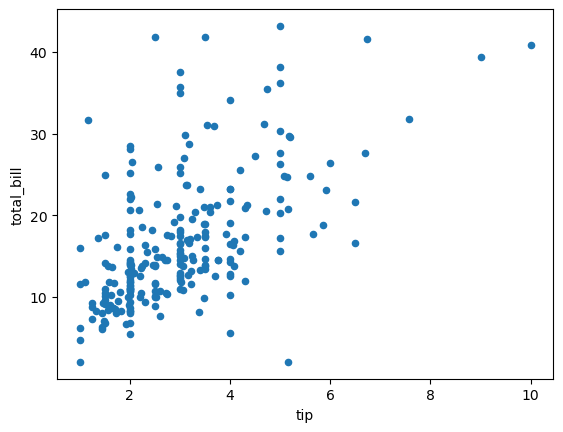

In [44]:
df.plot.scatter('tip', 'total_bill')
#Bu grafik; 'tip' (bahşiş) ve 'total_bill' (toplam hesap) arasındaki ilişkiyi görselleştirmek için kullanılır.

* Grafiğe bakıldığında poztif yönlü bir ilişki var gibi görünüyor. Fakat şiddeti hakkında bir yorum yapamıyorum

In [47]:
df['tip'].corr(df['total_bill'])

0.5766634471096374

* İki değişken arasında pozitif yönlü orta şiddetli bir korelayon vardır.Ödenen hesap arttıkça bahşişin de artttığını söyleyebiliriz.